In [1]:
from math import modf, pi, sin, cos
class angle():
    def __init__(self, gradi, primi):
        self.gradi = gradi
        self.primi = primi
    def rad(self):
        a = self.gradi
        b = self.primi/60
        return (a+b)*pi/180
    def sin(self):
        a = self.gradi
        b = self.primi/60
        c = (a+b)*pi/180
        return sin(c)
    def cos(self):
        a = self.gradi
        b = self.primi/60
        c = (a+b)*pi/180
        return cos(c)
    def somma(self, other):
        a1 = self.gradi
        a2 = other.gradi
        b1 = self.primi/60
        b2 = other.primi/60
        c1 = a1+b1
        c2 = a2+b2
        d = c1 + c2
        return angle(modf(d)[1], modf(d)[0]*60)
    def diff(self, other):
        a1 = self.gradi
        a2 = other.gradi
        b1 = self.primi/60
        b2 = other.primi/60
        c1 = a1+b1
        c2 = a2+b2
        d = c1 - c2
        return angle(modf(d)[1], modf(d)[0]*60)
    def opposto(self):
        return angle(-self.gradi, -self.primi)
    def __str__(self):
        return '{:.0f}'.format(self.gradi)+'° '+'{:.0f}'.format(self.primi)+"'"

In [2]:
def lin_fit_sigma_fit(data):
    x = data[:, 0]
    y = data[:, 1]
    N = len(x)
    x2 = x**2
    xy = x*y
    X = sum(x)
    X2 = sum(x2)
    XY = sum(xy)
    Y = sum(y)
    A = np.array([[X2, X],[X, N]])
    B = np.array([[XY],[Y]])
    sol = np.linalg.solve(A, B)
    a = sol[0, 0]
    b = sol[1, 0]
    Delta = N*X2-X**2
    y_fit = a*x+b
    sigma_fit = np.sqrt(sum((y_fit-y)**2)/(N-1))
    sigmaa = sigma_fit * np.sqrt(N/Delta)
    sigmab = sigma_fit * np.sqrt(X2/Delta)
    covab = -X/Delta * sigma_fit**2
    rho = covab/(sigmaa*sigmab)
    res = np.array([a, sigmaa, b, sigmab, rho])
    return res

def plot(x,y,xe,ye,fit=False,cs=5):
    fig, ax = plt.subplots(figsize=(10,10), dpi=100)
    ax.errorbar(x,y,xerr=xe,yerr=ye,linestyle='',capsize=cs,fmt='.',label='data')
    if fit==True:
        a,sigmaa,b,sigmab,rho=lin_fit_sigma_fit(np.hstack([x,y]).T)
        def lin(x,a,b):
            return a*x+b
        m,M=x.min(),x.max()
        ax.plot([m,M],[lin(m,a,b),lin(M,a,b)],zorder=100,color='orange',label=r'fit $a\cdot x+b$:'+'\n'+r'a={:.4f}+/-{:.4f}'.format(a,sigmaa)+'\n'+'b={:.4f}+/-{:.4f}'.format(b,sigmab)+'\n'+'corr.:{:.1f}'.format(rho))    
    ax.legend()
    plt.show()
    print((table(x,y,xe,ye).sort_values(by=['x'])))

a=(98.4+/-1.5) b=(-2.5+/-0.9)


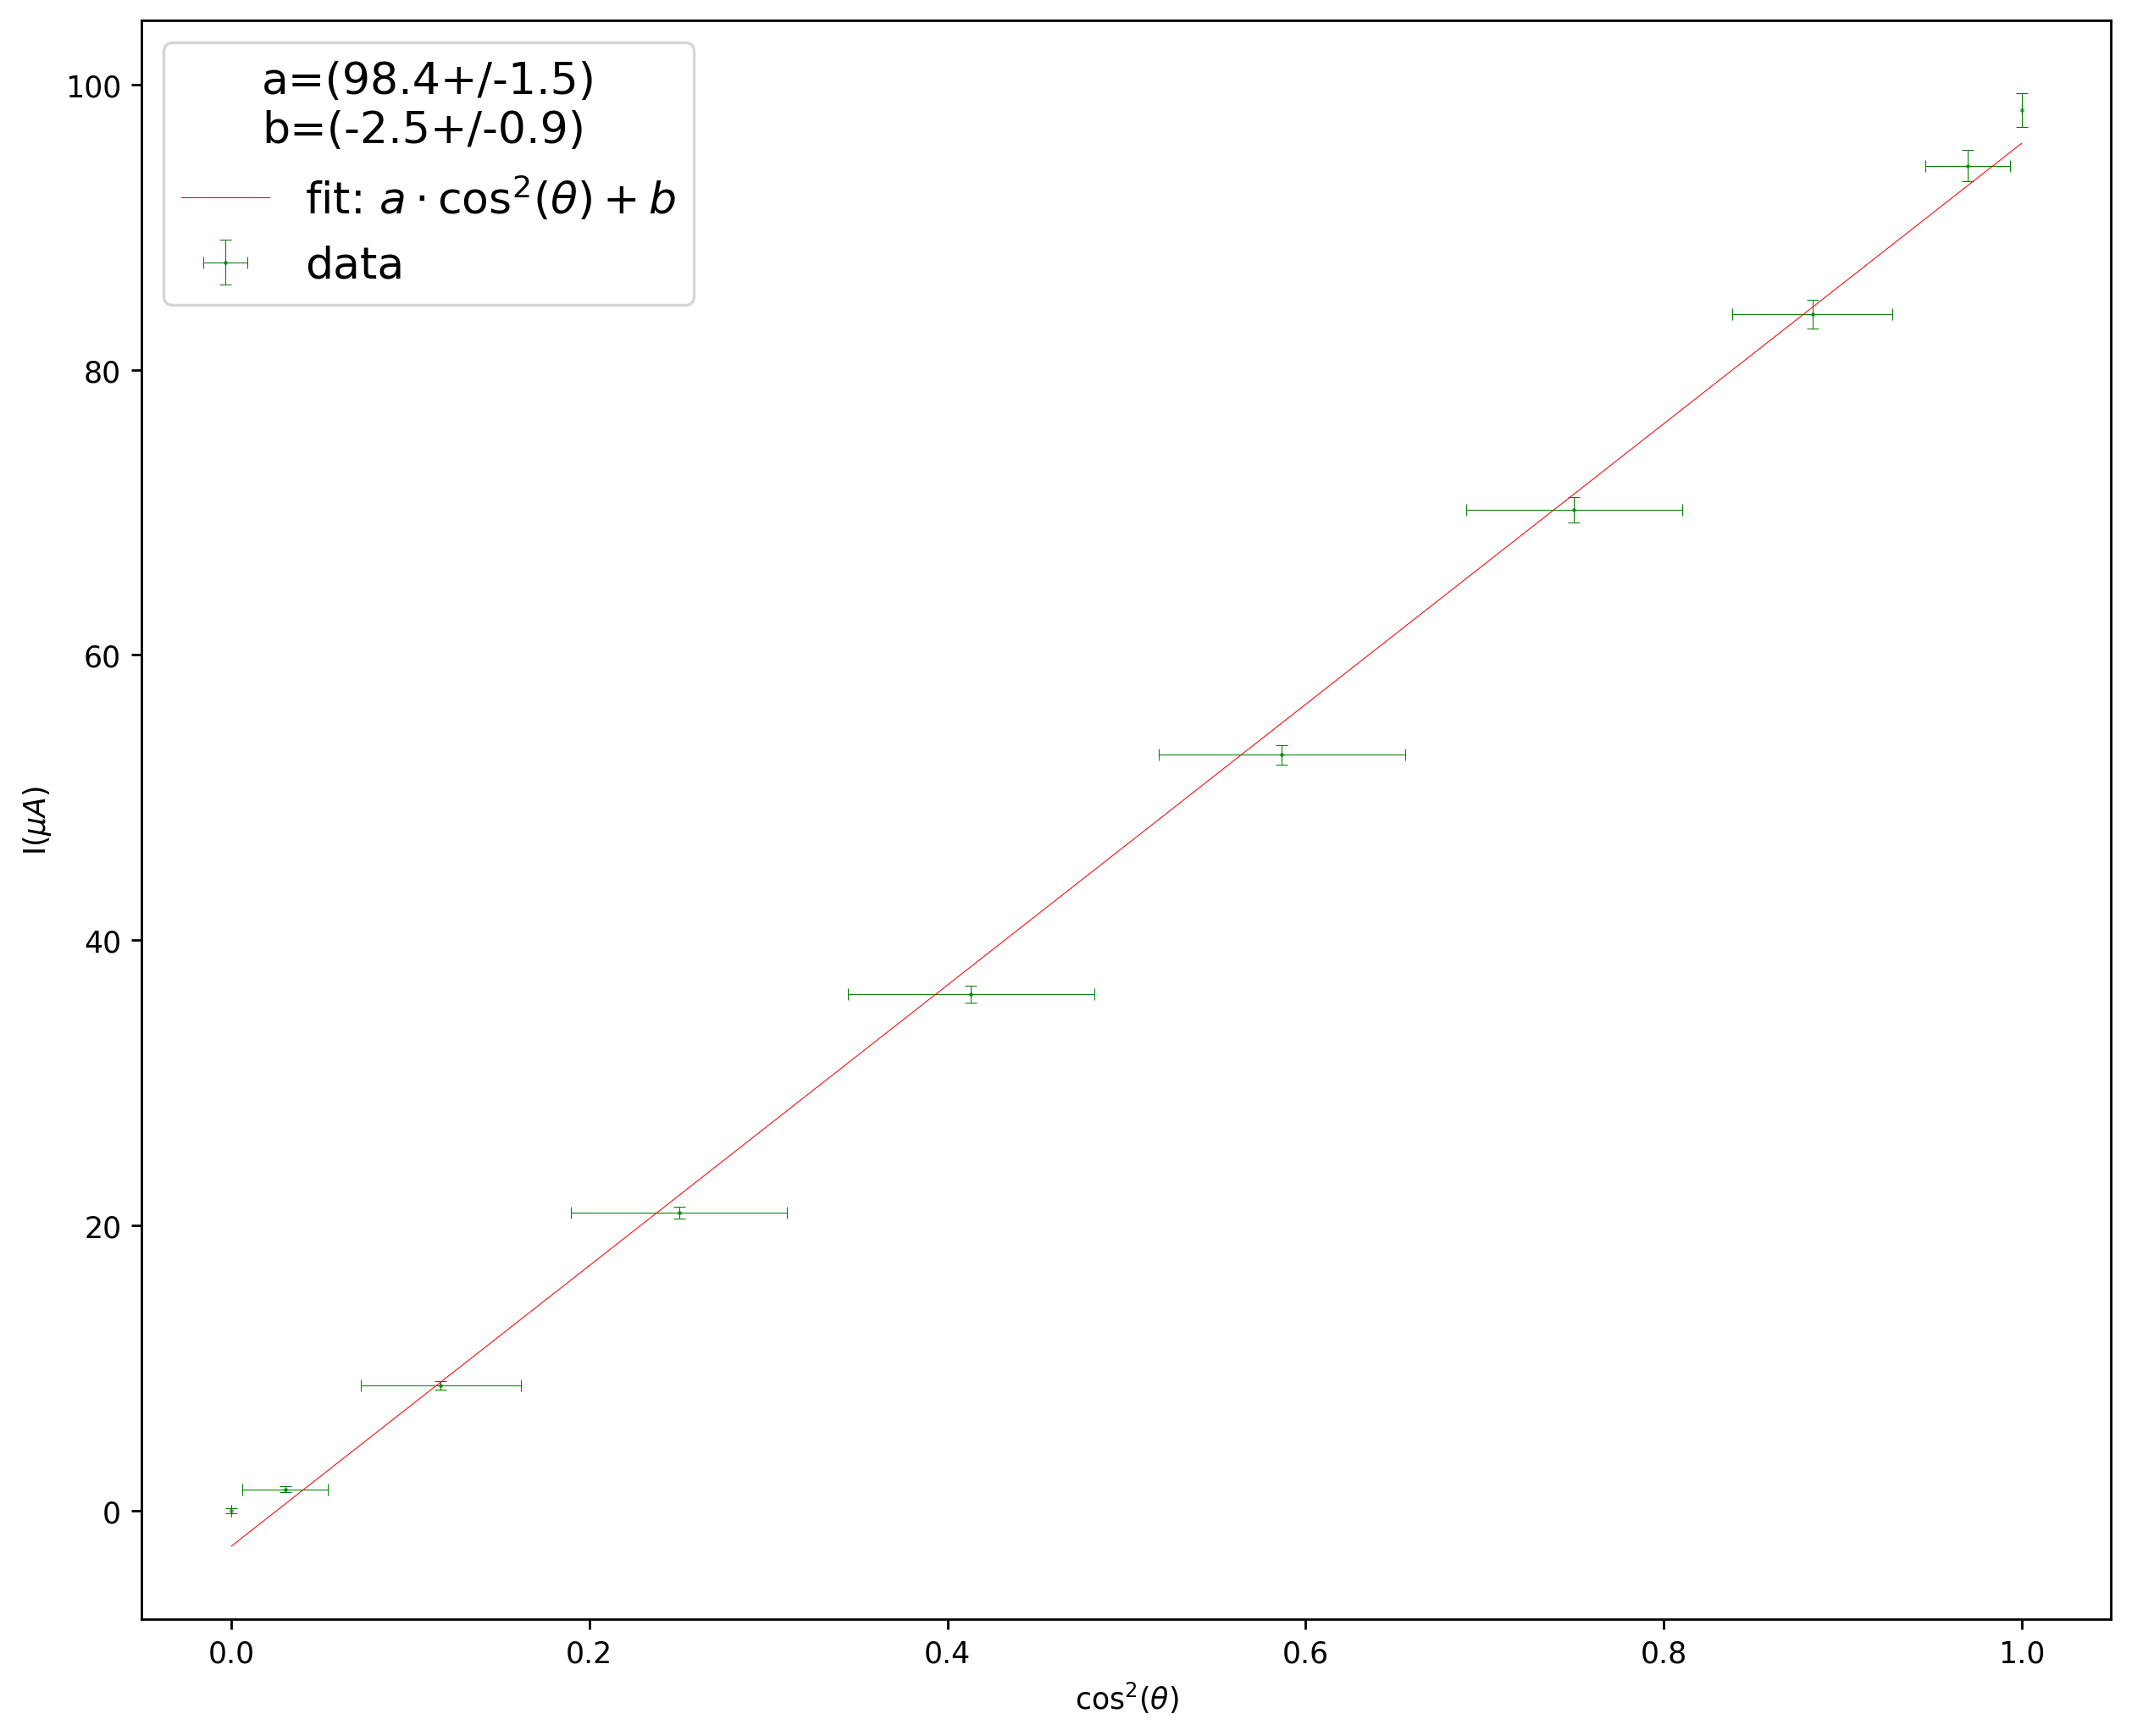

errori su cos2['0.000', '0.024', '0.045', '0.060', '0.069', '0.069', '0.060', '0.045', '0.024', '0.000']


In [3]:
import numpy as np
import matplotlib.pyplot as plt
I = [98.2, 94.3, 83.9, 70.2, 53.0, 36.2, 20.9, 8.8, 1.5, 0.0]
Theta = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
Cos = [angle.cos(angle(a, 0)) for a in Theta]
cos_np = np.array(Cos)
cos2 = cos_np**2
errcos2 = [2*angle.cos(angle(theta, 0))*angle.sin(angle(theta, 0))*4/180*np.pi for theta in Theta]
a, sigmaa, b, sigmab, rho = lin_fit_sigma_fit(np.transpose(np.vstack([cos2, I])))
print('a=({:.1f}+/-{:.1f})'.format(a, sigmaa), 'b=({:.1f}+/-{:.1f})'.format(b, sigmab))
errtheta = 4
errI = [1.2, 1.1, 1.0, 0.9, 0.7, 0.6, 0.4, 0.3, 0.2, 0.2]


plt.figure(figsize=(12,10), dpi=250)
plt.errorbar(x=cos2, y=I, yerr=errI, xerr=errcos2, fmt="o", markersize=0.3, capsize=2, linewidth=0.3, capthick=0.3, color='green', label='data')
plt.plot(cos2, a*np.array(cos2)+b, c='red', lw=0.3, label=r'fit: $a\cdot \cos^2(\theta) + b$')
plt.ylabel(r'I$(\mu A)$')
plt.xlabel(r'$\cos^2(\theta)$')
fit_info = [r'a=({:.1f}+/-{:.1f})'.format(a, sigmaa), r'b=({:.1f}+/-{:.1f})'.format(b, sigmab)]
info = '\n'.join(fit_info)
plt.legend(title=info, fontsize=15, title_fontsize=15)
plt.show()

print('errori su cos2'+str(['{:.3f}'.format(err) for err in errcos2]))


In [4]:
a = 2.682
b = 20.114
c = 0.655
lamb = 0.650
rho = a + b/lamb**2+c/lamb**4
print('rho = {}'.format(rho))

rho = 53.95843990056371


In [5]:
deltas1 = np.array([24]*7)
deltas2 = np.array([22, 22, 24, 24, 24, 24, 24])
theta1 = deltas1.mean()
theta2 = deltas2.mean()
s1 = np.std(deltas1)
s2 = np.std(deltas2)
print('theta1=({:.0f}+-2) (massimo)  ;  theta2=({:.0f}+-{:.0f}) (statistico)'.format(theta1, theta2,s2))
L=1
errL = 0.1
errtheta = 2
deltac1 = (4/L + errL*theta1/L**2*errtheta)/rho
c1 = theta1/(rho*L)
print('concentrazione 1 = {:.2f}+-{:.2f}'.format(c1, deltac1))

theta1=(24+-2) (massimo)  ;  theta2=(23+-1) (statistico)
concentrazione 1 = 0.44+-0.16


In [6]:
deltac2 = (4/L + errL*c1/L**2*s2*3)/rho
c2 = theta2/(rho*L)
print('concentrazione 2 = {:.1f}+-{:.1f}'.format(c2, deltac2))

concentrazione 2 = 0.4+-0.1


In [7]:
C = (c1+c2)/2
errC = (deltac1 + deltac2)/2
print('miglior stima di c = {:.2f}+-{:.2f}'.format(C, errC))

miglior stima di c = 0.44+-0.12
